# Welcome

<h3 style="font-size: 18px; color: #c92966;">Why CatBoost for Prediction?</h3>
<p style="font-size: 16px; color: #22b2a3;">
    In this project, we are predicting the mental health situations of individuals based on various circumstances and attributes. A critical challenge in this dataset is handling <span style="color: #3498db;">missing data</span> and <span style="color: #3498db;">categorical features</span>, which are common in real-world datasets related to personal and health-related information.
</p>

<p style="font-size: 16px; color: #22b2a3;">
    <span style="color: #3498db;">CatBoost</span> is an excellent choice for this scenario because it is specifically designed to handle <span style="color: #3498db;">categorical features</span> effectively. Unlike many other models that require one-hot encoding or similar preprocessing, <span style="color: #3498db;">CatBoost</span> can process categorical features directly using a unique encoding method, reducing memory usage and improving training speed.
</p>

<p style="font-size: 16px; color: #22b2a3;">
    Additionally, <span style="color: #3498db;">CatBoost</span> is robust in handling <span style="color: #3498db;">missing data</span>. It can automatically process missing values without requiring complex imputation techniques, ensuring that valuable information is not lost during preprocessing. This is particularly important in health-related datasets, where missing entries might hold implicit meanings or correlations.
</p>

<p style="font-size: 16px; color: #22b2a3;">
    Another advantage of <span style="color: #3498db;">CatBoost</span> is its ability to prevent overfitting. Its implementation of <span style="color: #3498db;">ordered boosting</span> ensures that each step of the training process uses unbiased information, making it ideal for datasets where overfitting to noise or missing patterns could be a concern.
</p>

<p style="font-size: 16px; color: #22b2a3;">
    In summary, <span style="color: #3498db;">CatBoost</span> provides a powerful solution for predicting mental health situations in datasets with significant <span style="color: #3498db;">missing data</span> and <span style="color: #3498db;">categorical features</span>, ensuring optimal model performance without extensive preprocessing.
</p>


# Importing required libraries and reading the dataset:

In [25]:
import numpy as np 
import pandas as pd

# Visualization Libraries
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import squarify
import plotly.graph_objects as go
import plotly.express as px
%matplotlib inline

In [26]:
train = pd.read_csv('/kaggle/input/playground-series-s4e11/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s4e11/test.csv')
sample = pd.read_csv('/kaggle/input/playground-series-s4e11/sample_submission.csv')

In [27]:
train.head(10)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0
5,5,Vani,Female,59.0,Ahmedabad,Working Professional,Finanancial Analyst,NaN,2.0,NaN,NaN,5.0,5-6 hours,Healthy,MCA,No,7.0,5.0,No,0
6,6,Ritvik,Male,47.0,Thane,Working Professional,Chemist,NaN,5.0,NaN,NaN,2.0,7-8 hours,Moderate,MD,No,6.0,2.0,No,0
7,7,Rajveer,Male,38.0,Nashik,Working Professional,Teacher,NaN,3.0,NaN,NaN,4.0,7-8 hours,Unhealthy,B.Pharm,No,10.0,3.0,Yes,0
8,8,Aishwarya,Female,24.0,Bangalore,Student,NaN,2.0,NaN,5.90,5.0,NaN,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
9,9,Simran,Female,42.0,Patna,Working Professional,Electrician,NaN,4.0,NaN,NaN,1.0,5-6 hours,Healthy,ME,Yes,7.0,2.0,Yes,0


# Chacking the amount of missing values for each feature in the dataset

In [28]:
train.isnull().sum()

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

# EDA

## The shape of the dataset:

In [29]:
train.shape

(140700, 20)

## Number of unique values for each feature:

In [30]:
train.nunique()

id                                       140700
Name                                        422
Gender                                        2
Age                                          43
City                                         98
Working Professional or Student               2
Profession                                   64
Academic Pressure                             5
Work Pressure                                 5
CGPA                                        331
Study Satisfaction                            5
Job Satisfaction                              5
Sleep Duration                               36
Dietary Habits                               23
Degree                                      115
Have you ever had suicidal thoughts ?         2
Work/Study Hours                             13
Financial Stress                              5
Family History of Mental Illness              2
Depression                                    2
dtype: int64

## Describing the dataset and see the behavior of the datas for each feature(column):

In [31]:
train.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,140700.000000,140700.000000,27897.000000,112782.000000,27898.000000,27897.000000,112790.000000,140700.000000,140696.000000,140700.000000
mean,70349.500000,40.388621,3.142273,2.998998,7.658636,2.944940,2.974404,6.252679,2.988983,0.181713
std,40616.735775,12.384099,1.380457,1.405771,1.464466,1.360197,1.416078,3.853615,1.413633,0.385609
min,0.000000,18.000000,1.000000,1.000000,5.030000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,35174.750000,29.000000,2.000000,2.000000,6.290000,2.000000,2.000000,3.000000,2.000000,0.000000
50%,70349.500000,42.000000,3.000000,3.000000,7.770000,3.000000,3.000000,6.000000,3.000000,0.000000
75%,105524.250000,51.000000,4.000000,4.000000,8.920000,4.000000,4.000000,10.000000,4.000000,0.000000
max,140699.000000,60.000000,5.000000,5.000000,10.000000,5.000000,5.000000,12.000000,5.000000,1.000000


In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

## 44 hours sleep duration??
<h3 style="font-size: 18px; color: #c92966;">Why Preprocess Sleep Duration?</h3>
<p style="font-size: 16px; color: #22b2a3;">
    The <span style="color: #3498db;">Sleep Duration</span> feature contains a variety of unique values, some of which are invalid, inconsistent, or irrelevant. For example, entries like <span style="color: #3498db;">"40-45 hours"</span> or <span style="color: #3498db;">"55-66 hours"</span> are physiologically impossible and likely result from data entry errors. Such outliers can skew the model's learning process, leading to poor predictions. Preprocessing is necessary to handle these anomalies and extract meaningful insights.
</p>

<p style="font-size: 16px; color: #22b2a3;">
    Additionally, categorical entries like <span style="color: #3498db;">"Moderate"</span> and <span style="color: #3498db;">"Unhealthy"</span> are subjective and lack precise numerical interpretation. Similarly, irrelevant values like <span style="color: #3498db;">"Indore"</span> or <span style="color: #3498db;">"Pune"</span> are unrelated to sleep duration and must be addressed to ensure the dataset's integrity.
</p>

<h3 style="font-size: 18px; color: #c92966;">Steps Taken for Preprocessing</h3>
<p style="font-size: 16px; color: #22b2a3;">
    To address these issues, a <span style="color: #3498db;">manual mapping</span> was defined, converting valid entries into numerical values and categorizing invalid or irrelevant entries as <span style="color: #3498db;">NaN</span>. For instance:
    <ul style="font-size: 16px; color: #22b2a3;">
        <li><span style="color: #3498db;">"7-8 hours"</span> is mapped to <span style="color: #3498db;">8</span>, representing typical sleep duration in hours.</li>
        <li><span style="color: #3498db;">"40-45 hours"</span> and similar entries are categorized as <span style="color: #3498db;">0</span> (invalid).</li>
        <li>Subjective terms like <span style="color: #3498db;">"Moderate"</span> and <span style="color: #3498db;">"Unhealthy"</span> are assigned numerical placeholders to allow the model to interpret them contextually.</li>
    </ul>
</p>

<p style="font-size: 16px; color: #22b2a3;">
    The mapping ensures that the data is clean, consistent, and interpretable by the model. Irrelevant or impossible entries are removed or replaced with <span style="color: #3498db;">NaN</span>, preserving only valid, meaningful information.
</p>

<h3 style="font-size: 18px; color: #c92966;">Benefits of Preprocessing</h3>
<p style="font-size: 16px; color: #22b2a3;">
    By preprocessing the <span style="color: #3498db;">Sleep Duration</span> feature:
    <ul style="font-size: 16px; color: #22b2a3;">
        <li>The model avoids being influenced by extreme outliers or irrelevant data.</li>
        <li>Feature consistency is improved, enhancing the model's ability to learn meaningful patterns.</li>
        <li>Numerical encoding ensures that categorical terms are properly integrated into the model without introducing noise.</li>
    </ul>
</p>

<p style="font-size: 16px; color: #22b2a3;">
    Overall, this preprocessing step is critical for ensuring the dataset's quality, leading to better model performance and more reliable predictions.
</p>


In [33]:
train['Sleep Duration'].unique()

array(['More than 8 hours', 'Less than 5 hours', '5-6 hours', '7-8 hours',
       'Sleep_Duration', '1-2 hours', '6-8 hours', '4-6 hours',
       '6-7 hours', '10-11 hours', '8-9 hours', '40-45 hours',
       '9-11 hours', '2-3 hours', '3-4 hours', 'Moderate', '55-66 hours',
       '4-5 hours', '9-6 hours', '1-3 hours', 'Indore', '45', '1-6 hours',
       '35-36 hours', '8 hours', 'No', '10-6 hours', 'than 5 hours',
       '49 hours', 'Unhealthy', 'Work_Study_Hours', '3-6 hours',
       '45-48 hours', '9-5', 'Pune', '9-5 hours'], dtype=object)

In [34]:
# Define the manual mapping for `Sleep Duration`
sleep_duration_mapping = {
    '1-2hours': 1,
    '2-3hours': 2,
    '3-4hours': 3,
    '4-5hours': 4,
    '5-6hours': 5,
    '6-7hours': 6,
    '6-8hours': 7,
    '7-8hours': 8,
    '8hours': 8,
    '6-9hours': 9,
    '10-11hours': 9,  # "More than 8 hours"
    'Morethan8hours': 9,
    'Moderate': 10,
    'Unhealthy': 11,
    'Unknown': 'NaN' # Replace unknown or invalid entries with 0
}

# Apply the mapping directly to the `Sleep Duration` column
train_encoded = train.copy()
train_encoded['Sleep Duration'] = train_encoded['Sleep Duration'].apply(
    lambda x: sleep_duration_mapping.get(x.replace(" ", ""), 0)
)

In [35]:
# Define categorical features
categorical_features = ['Gender', 'City', 'Working Professional or Student', 
                        'Profession', 'Dietary Habits', 'Degree', 
                        'Have you ever had suicidal thoughts ?', 
                        'Family History of Mental Illness']

## Its time to label the datas: 

<h3 style="font-size: 18px; color: #c92966;">Why Use Label Encoding?</h3>
<p style="font-size: 16px; color: #22b2a3;">
    <span style="color: #3498db;">Label encoding</span> is a preprocessing technique used to convert categorical data into numerical form. Many machine learning models, including <span style="color: #3498db;">CatBoost</span>, perform better with numerical inputs. Label encoding assigns a unique numerical value to each category, ensuring that the information from categorical features can be interpreted by the model.
</p>

<p style="font-size: 16px; color: #22b2a3;">
    For example, a categorical feature like <span style="color: #3498db;">"Sleep Quality"</span> with values <span style="color: #3498db;">["Poor", "Average", "Good"]</span> could be encoded as:
    <ul style="font-size: 16px; color: #22b2a3;">
        <li><span style="color: #3498db;">"Poor"</span>: 0</li>
        <li><span style="color: #3498db;">"Average"</span>: 1</li>
        <li><span style="color: #3498db;">"Good"</span>: 2</li>
    </ul>
    This numerical representation allows the model to leverage categorical information effectively.
</p>

<h3 style="font-size: 18px; color: #c92966;">Advantages of Label Encoding</h3>
<p style="font-size: 16px; color: #22b2a3;">
    <ul style="font-size: 16px; color: #22b2a3;">
        <li><span style="color: #3498db;">Simplifies Data:</span> Converts non-numerical data into a numerical format suitable for machine learning algorithms.</li>
        <li><span style="color: #3498db;">Efficient Memory Usage:</span> Unlike one-hot encoding, label encoding does not increase the dataset's dimensionality.</li>
        <li><span style="color: #3498db;">Preserves Model Compatibility:</span> Works seamlessly with models like <span style="color: #3498db;">CatBoost</span>, which handles numerical and categorical data effectively.</li>
    </ul>
</p>

<h3 style="font-size: 18px; color: #c92966;">Handling the Test Set</h3>
<p style="font-size: 16px; color: #22b2a3;">
    To ensure consistency between training and testing phases, the same label encoders used on the training set will be applied to the test set. This guarantees that:
    <ul style="font-size: 16px; color: #22b2a3;">
        <li>Test data categories are encoded identically to training data categories.</li>
        <li>No new categories or inconsistencies are introduced during testing, preventing errors or misinterpretation by the model.</li>
        <li>The encoded test set aligns with the training data format, maintaining the model's ability to generalize effectively.</li>
    </ul>
</p>

<h3 style="font-size: 18px; color: #c92966;">Summary</h3>
<p style="font-size: 16px; color: #22b2a3;">
    By implementing <span style="color: #3498db;">label encoding</span> and retaining the encoders for the test set, the preprocessing pipeline remains robust, consistent, and optimized for reliable model performance.
</p>


In [36]:
from sklearn.preprocessing import LabelEncoder

# Dictionary to store encoders for each feature
encoders = {}

# Apply Label Encoding to other categorical features and save encoders
for col in categorical_features:
    if col == 'Sleep Duration':
        pass
    else:
        le = LabelEncoder()
        train_encoded[col] = le.fit_transform(train_encoded[col].astype(str))
        encoders[col] = le  # Save each encoder

# Convert all columns to numeric, setting non-convertible entries to NaN
train_encoded = train_encoded.apply(pd.to_numeric, errors='coerce')


In [37]:
train_encoded.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,NaN,0,49.0,50,1,10,NaN,5.0,NaN,NaN,2.0,9,7,33,0,1.0,2.0,0,0
1,1,NaN,1,26.0,93,1,55,NaN,4.0,NaN,NaN,3.0,0,20,63,1,7.0,3.0,0,1
2,2,NaN,1,33.0,97,0,64,5.0,NaN,8.97,2.0,NaN,5,7,21,1,3.0,1.0,0,1
3,3,NaN,1,22.0,64,1,55,NaN,5.0,NaN,NaN,1.0,0,15,28,1,10.0,1.0,1,1
4,4,NaN,0,30.0,37,1,9,NaN,1.0,NaN,NaN,1.0,5,20,28,1,9.0,4.0,1,0


## Removing the unnecessary features for training: 

In [14]:
train_encoded.drop(['Name' , 'id' , 'CGPA' ] , axis = 1 , inplace = True)

## Visualizations for Understanding Feature Relationships
<h3 style="font-size: 18px; color: #c92966;">Why Use Visualizations Like Boxplots and Countplots?</h3>
<p style="font-size: 16px; color: #22b2a3;">
    In this project, various visualizations were used to explore and understand the relationships between features and their potential influence on mental health predictions. Visualizations like <span style="color: #3498db;">boxplots</span>, <span style="color: #3498db;">countplots</span>, and <span style="color: #3498db;">stacked bar charts</span> provide insight into the data distribution, highlight patterns, and reveal outliers or anomalies.
</p>

<h3 style="font-size: 18px; color: #c92966;">Boxplots for Outliers and Distribution</h3>
<p style="font-size: 16px; color: #22b2a3;">
    <span style="color: #3498db;">Boxplots</span> are particularly useful for identifying outliers and understanding the range and distribution of continuous variables. For example, they help us see how <span style="color: #3498db;">financial stress</span> or <span style="color: #3498db;">sleep duration</span> varies across individuals, and if there are any unusual values that might need further investigation or preprocessing. Boxplots make it easy to spot these extremes, ensuring that such outliers do not adversely affect model training.
</p>

<h3 style="font-size: 18px; color: #c92966;">Countplots and Stacked Bar Charts for Categorical Distributions</h3>
<p style="font-size: 16px; color: #22b2a3;">
    <span style="color: #3498db;">Countplots</span> are ideal for visualizing categorical data distributions, such as <span style="color: #3498db;">study satisfaction</span> or <span style="color: #3498db;">job satisfaction</span>. They allow us to observe the frequency of each category, helping to identify potential imbalances in the dataset. In this project, countplots were applied to analyze features that might impact mental health, showing how satisfaction levels vary across respondents.
</p>

<p style="font-size: 16px; color: #22b2a3;">
    <span style="color: #3498db;">Stacked bar charts</span> were also used to examine the relationship between <span style="color: #3498db;">academic pressure</span> and <span style="color: #3498db;">depression levels</span>. By comparing the counts of individuals with and without depressive symptoms across different levels of academic pressure, we can see if certain pressures are associated with higher depression rates.
</p>

<h3 style="font-size: 18px; color: #c92966;">Acknowledgment of Resources and Learning</h3>
<p style="font-size: 16px; color: #22b2a3;">
    These visualizations were inspired by and adapted from an excellent resource by <a href="https://www.kaggle.com/code/annastasy/mental-health-eda-simple-starter#-1.-Import-Necessary-Libraries-" style="color: #3498db;">this Kaggle notebook by Annastasy</a>. This notebook provided helpful guidance on creating meaningful visualizations for exploratory data analysis (EDA), and I learned valuable techniques that improved my understanding of how to approach and interpret visual data.
</p>

<p style="font-size: 16px; color: #22b2a3;">
    Overall, using a combination of boxplots, countplots, and stacked bar charts allowed for a deeper insight into the dataset, highlighting key patterns and relationships that could impact the predictive model.
</p>


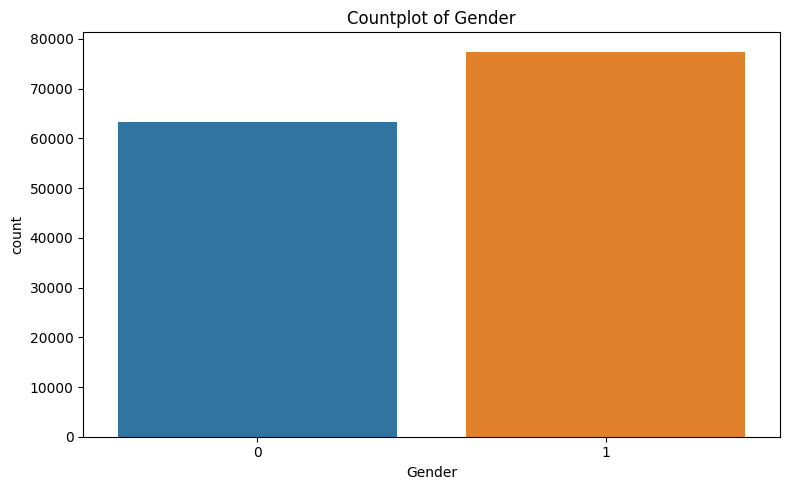

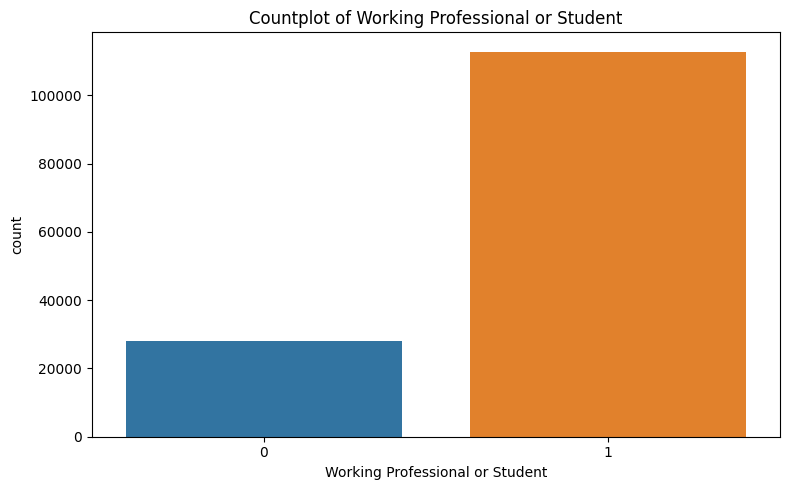

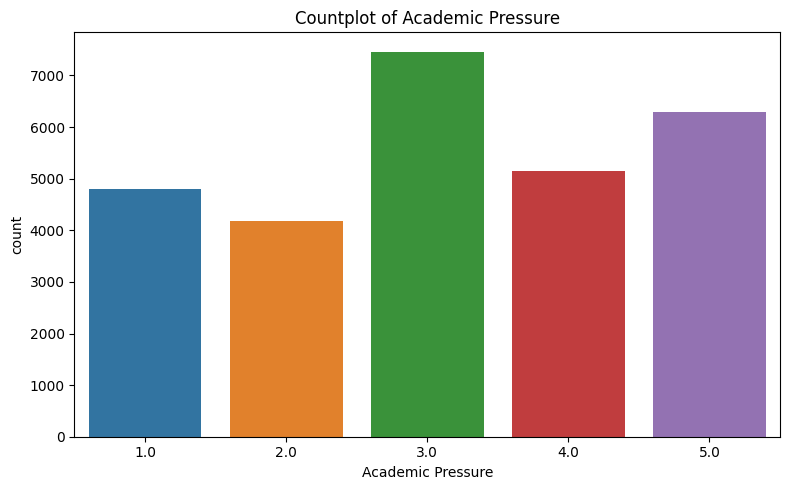

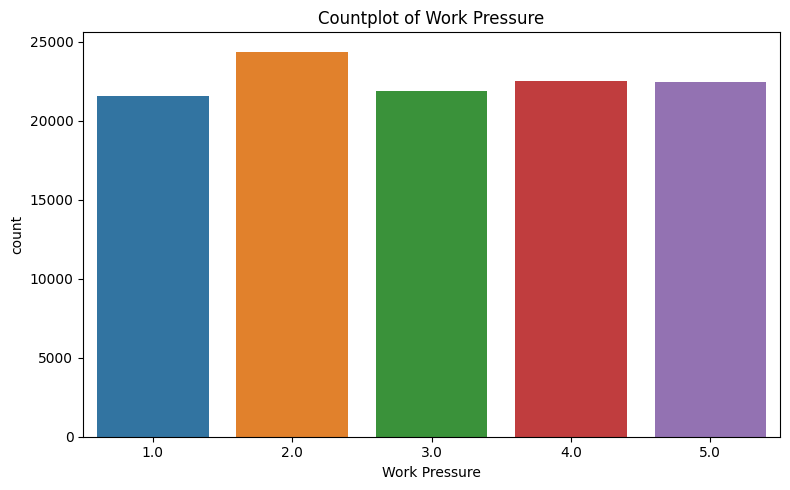

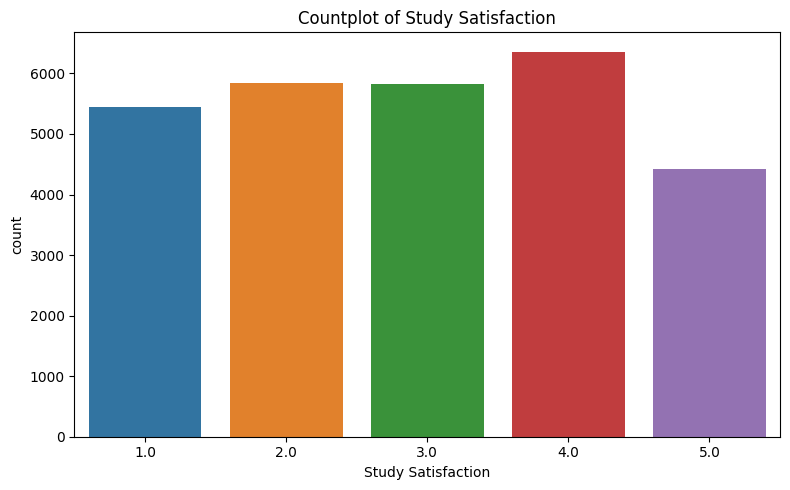

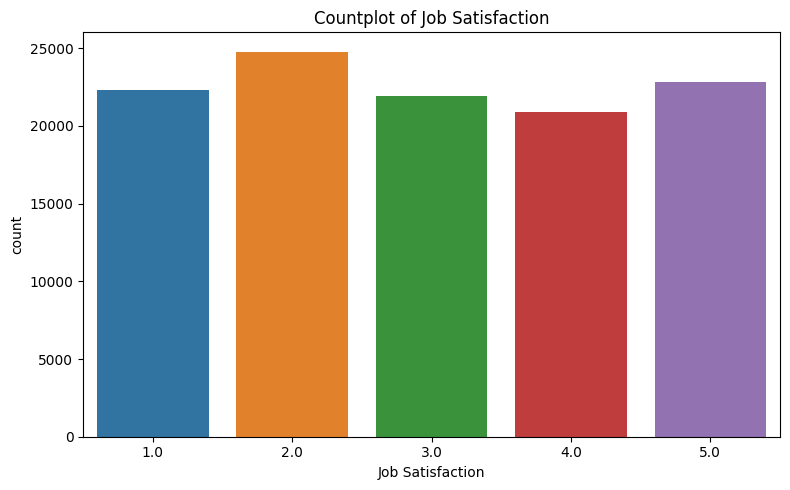

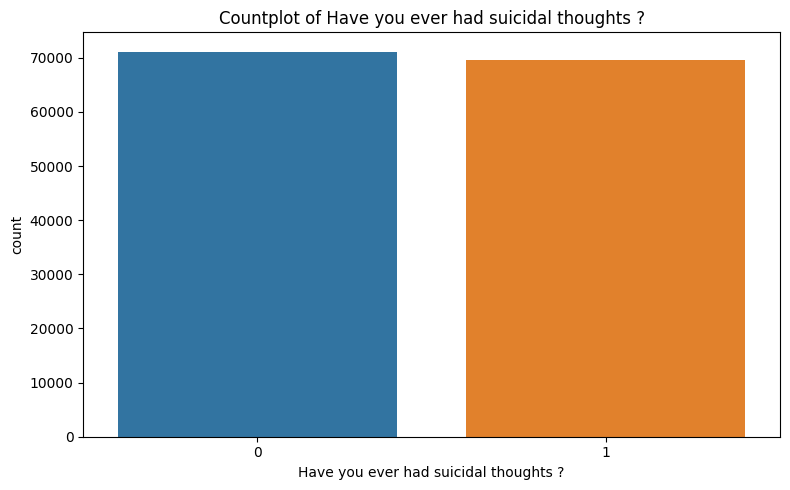

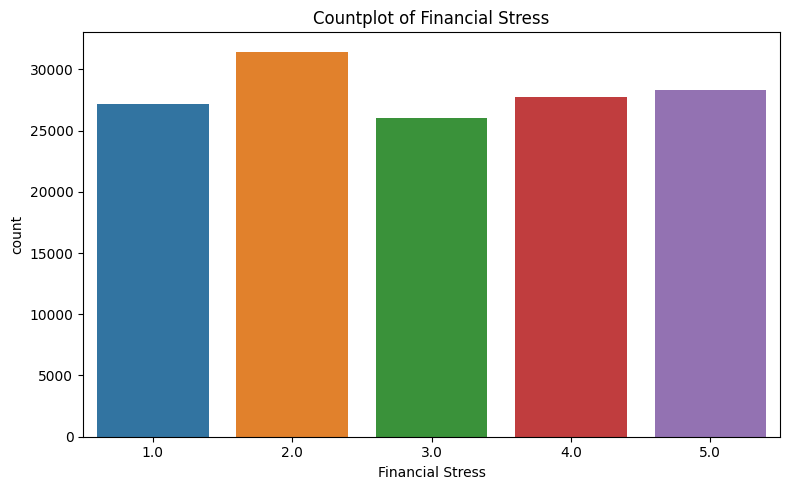

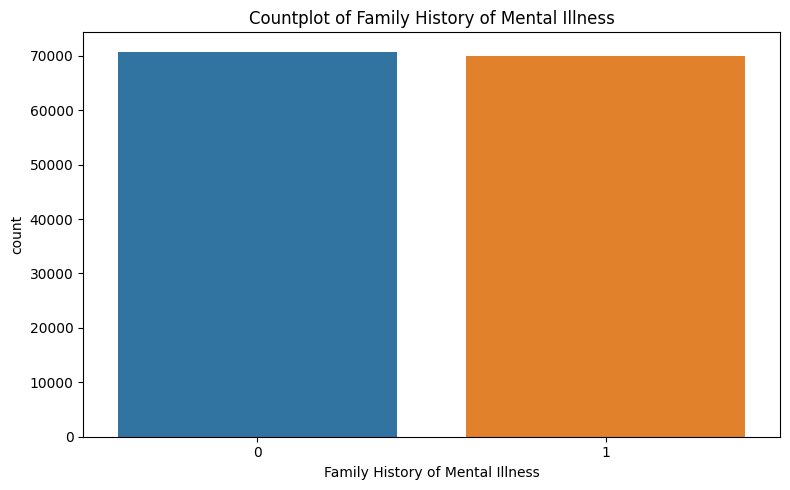

In [15]:
categorical_columns_to_plot = ['Gender', 'Working Professional or Student', 'Academic Pressure', 
                       'Work Pressure', 'Study Satisfaction', 'Job Satisfaction',
                       'Have you ever had suicidal thoughts ?', 'Financial Stress', 
                       'Family History of Mental Illness']

# Plot countplots for each categorical column
for column in categorical_columns_to_plot:
    
    plt.figure(figsize=(8, 5))
    sns.countplot(data=train_encoded, x=column)
    plt.title(f'Countplot of {column}')
    
    plt.tight_layout()
    plt.show()

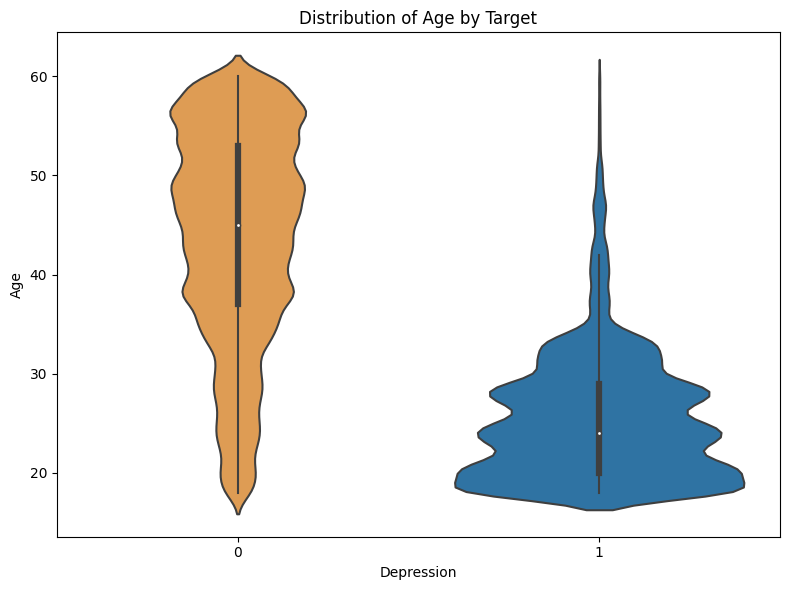

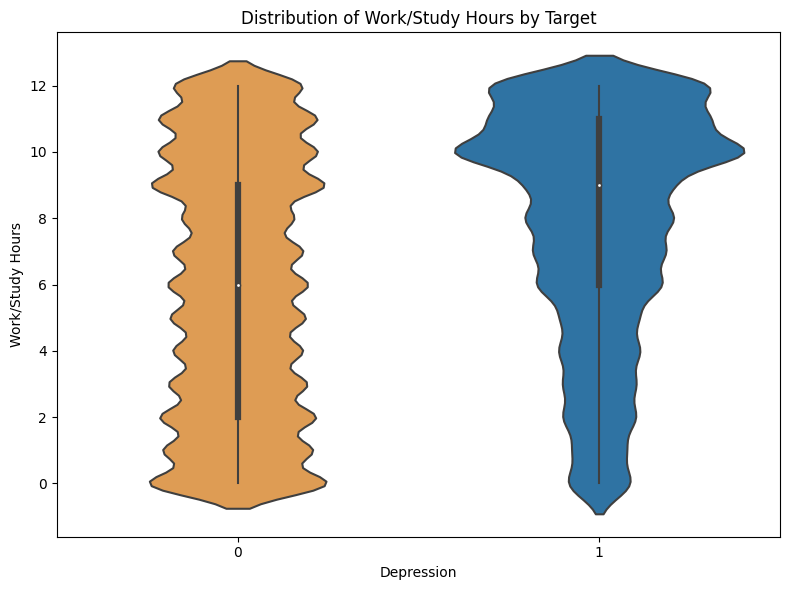

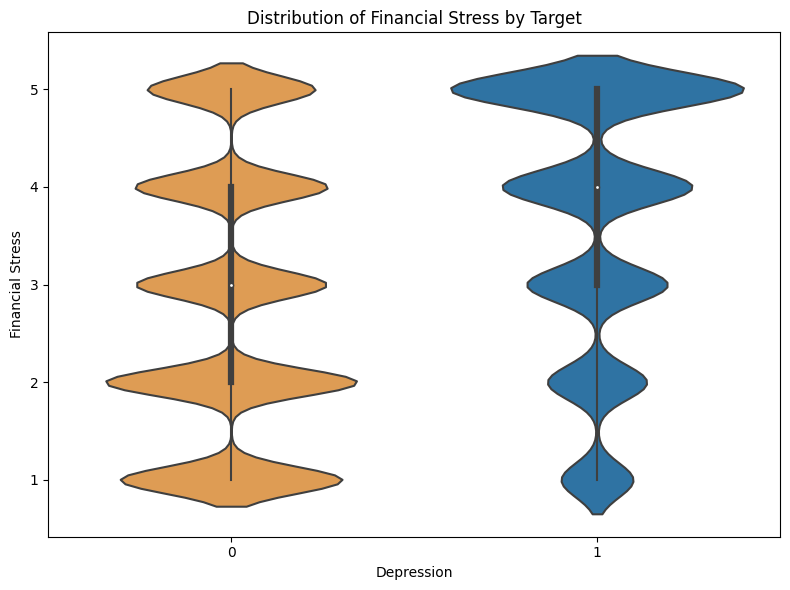

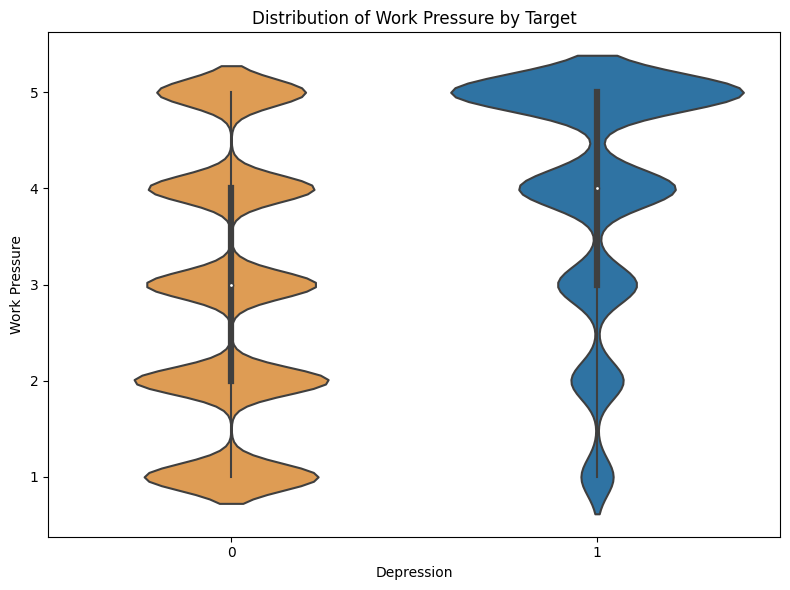

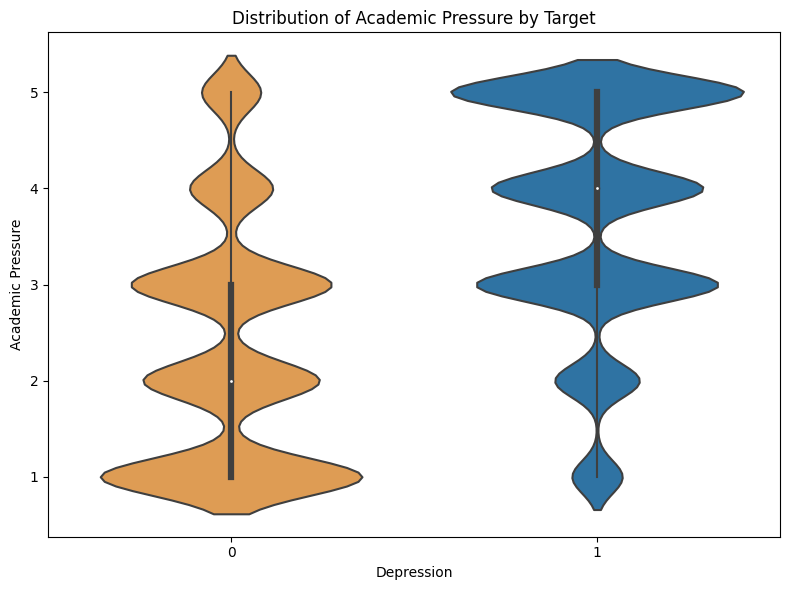

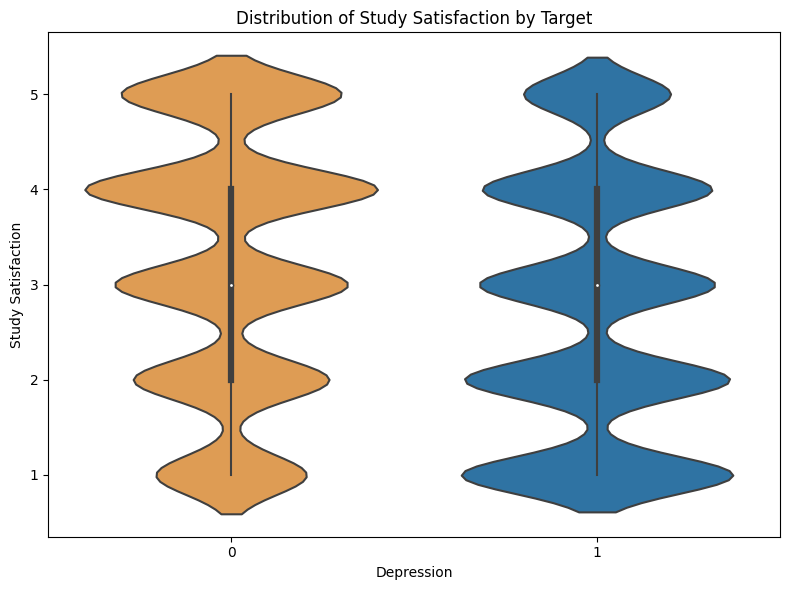

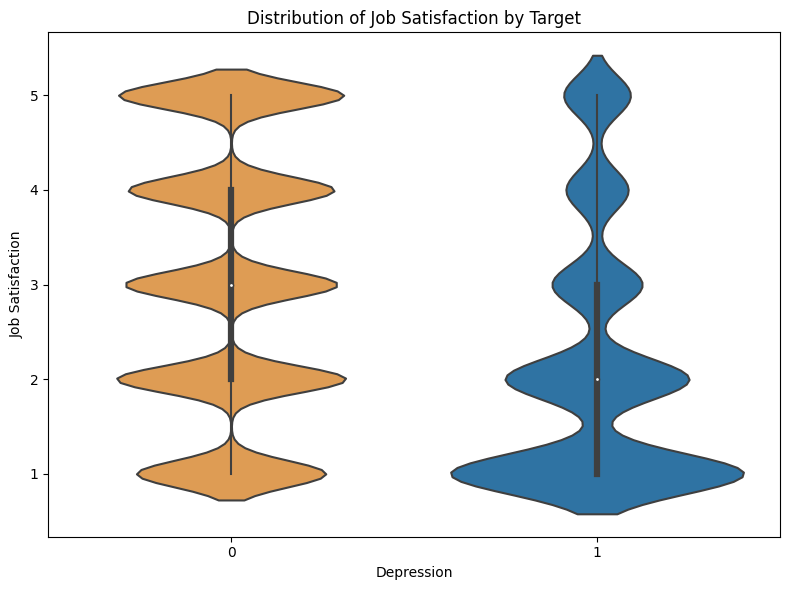

In [16]:
numerical_columns_to_plot = ["Age", "Work/Study Hours",'Financial Stress','Work Pressure' , 'Academic Pressure'
                            ,'Study Satisfaction' , 'Job Satisfaction']
colors= ['#1c76b6', '#a7dae9', '#eb6a20', '#f59d3d', '#677fa0', '#d6e4ed', '#f7e9e5']
sns.set_palette(colors)
bi_palette = [colors[3], colors[0]]

for column in numerical_columns_to_plot:
    plt.figure(figsize=(8, 6))
    sns.violinplot(data=train_encoded, x='Depression', y=column, palette=bi_palette) 
    plt.title(f'Distribution of {column} by Target')

    plt.tight_layout()
    plt.show()

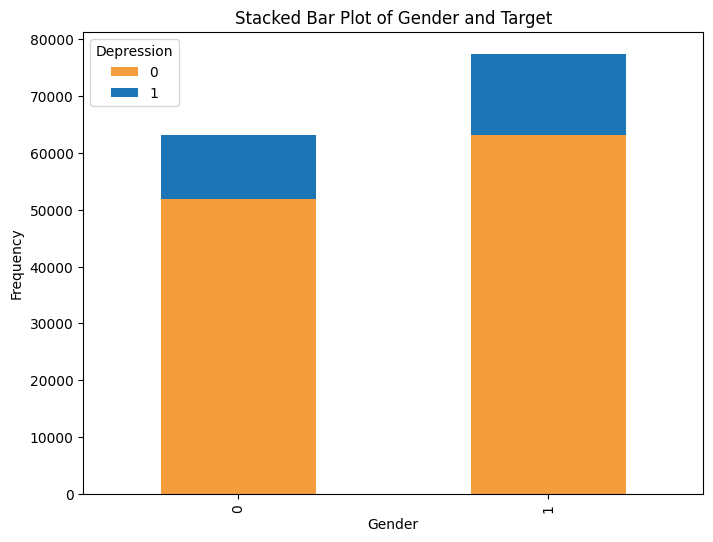

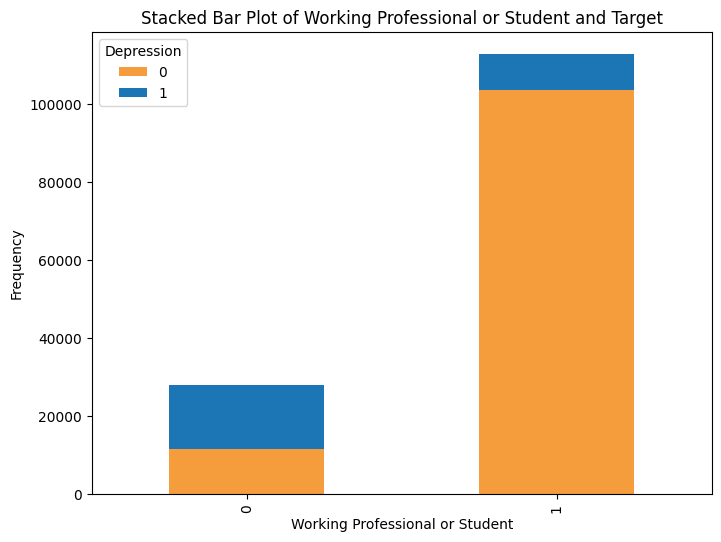

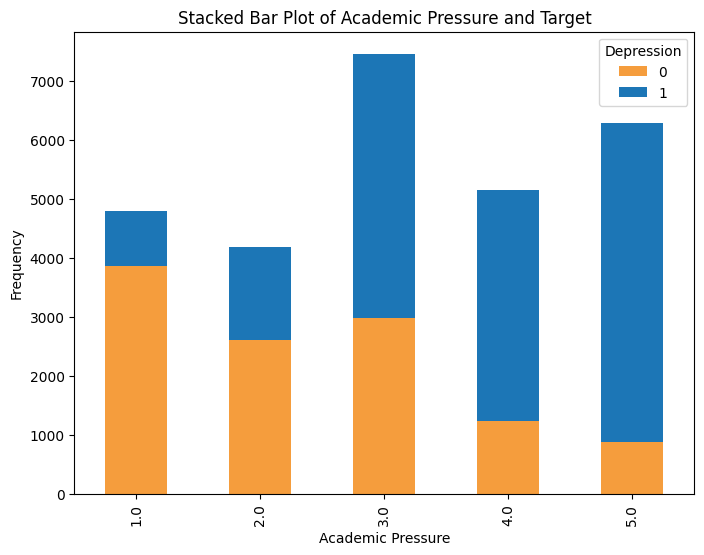

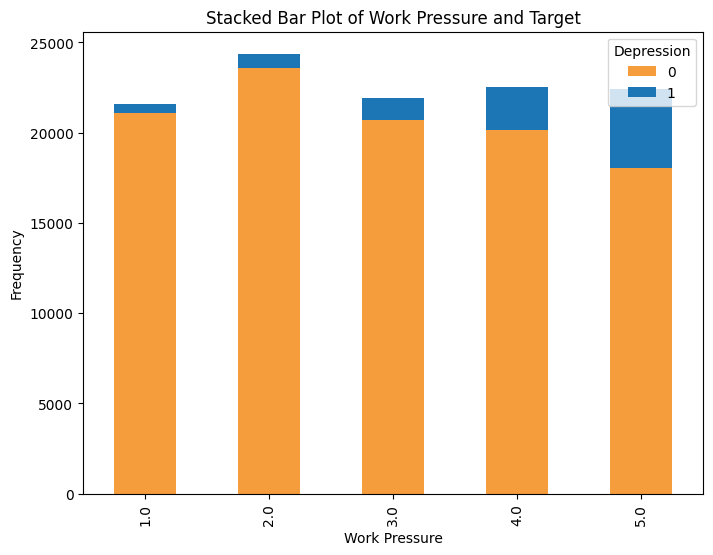

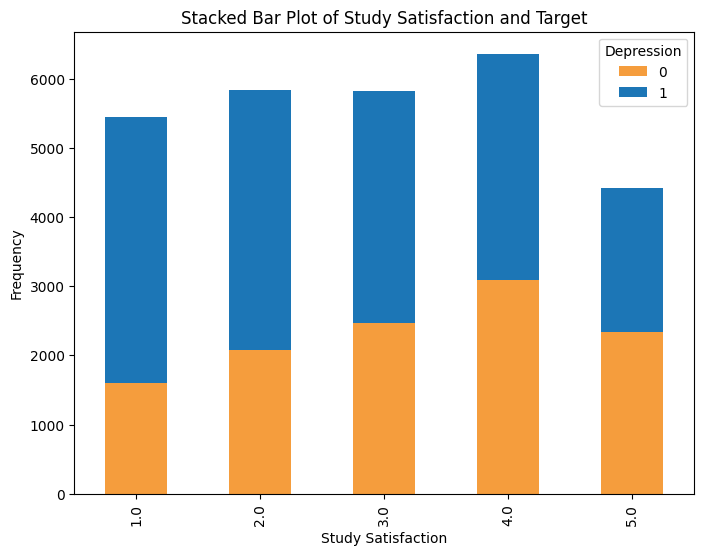

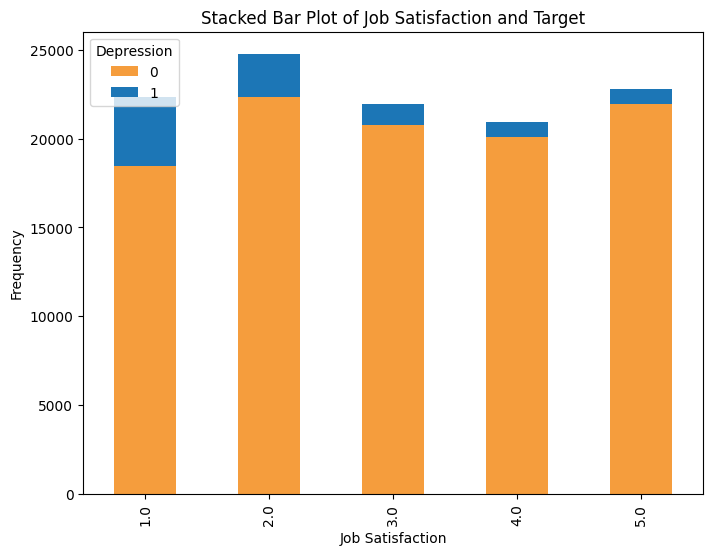

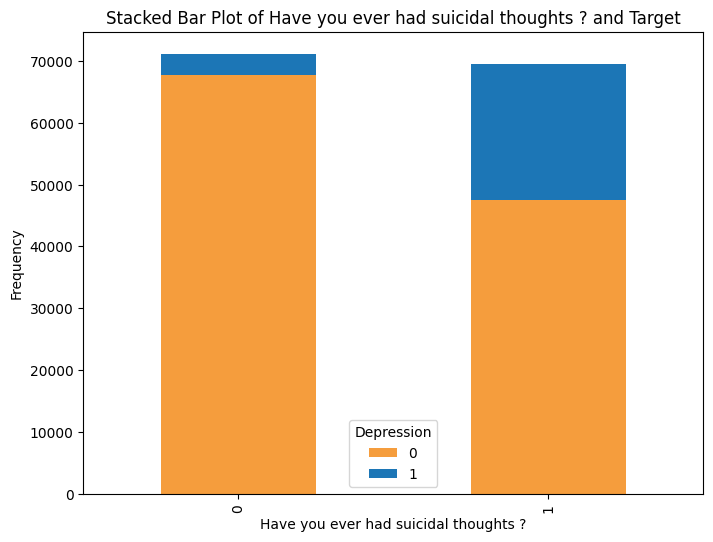

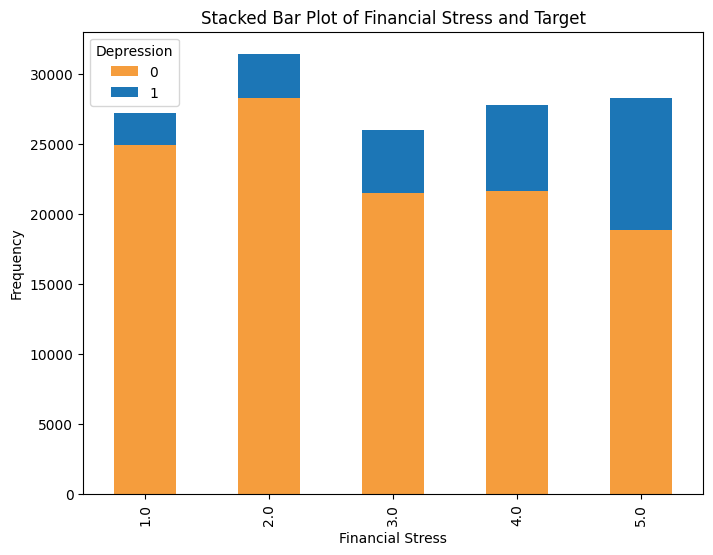

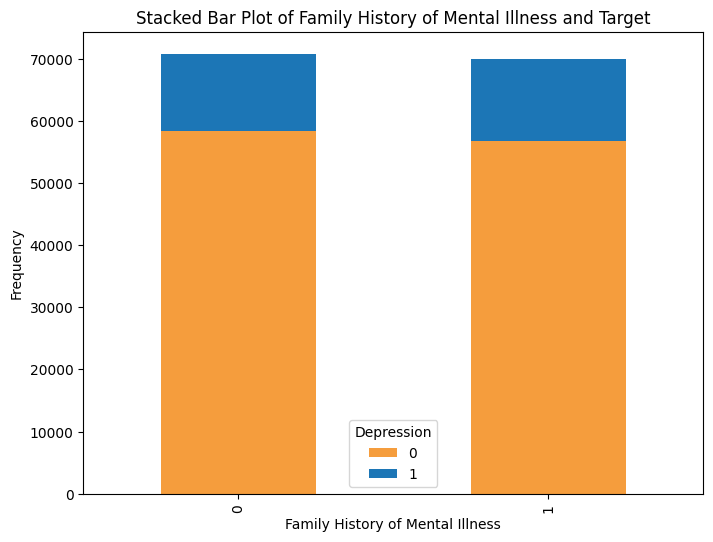

In [17]:
cmap = LinearSegmentedColormap.from_list("custom_cmap", bi_palette)

# Loop through each categorical column in your list
for column in categorical_columns_to_plot: 
    # Stacked Bar Plot
    pd.crosstab(train_encoded[column], train_encoded['Depression']).plot(kind='bar', stacked=True, colormap=cmap, figsize=(8, 6))
    plt.title(f"Stacked Bar Plot of {column} and Target")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

In [18]:
correlation_matrix = train_encoded.corr(numeric_only=True)

# Create an interactive heatmap with orange and blue colors and larger size
fig = px.imshow(correlation_matrix, 
                text_auto=True,  # Display correlation values
                color_continuous_scale='RdYlBu',  # Color scale with shades of red, yellow, and blue
                title='Heatmap of Correlation Matrix',
                width=1000,  # Adjust width
                height=800,  # Adjust height
                aspect='auto')

# Show the plot
fig.show()

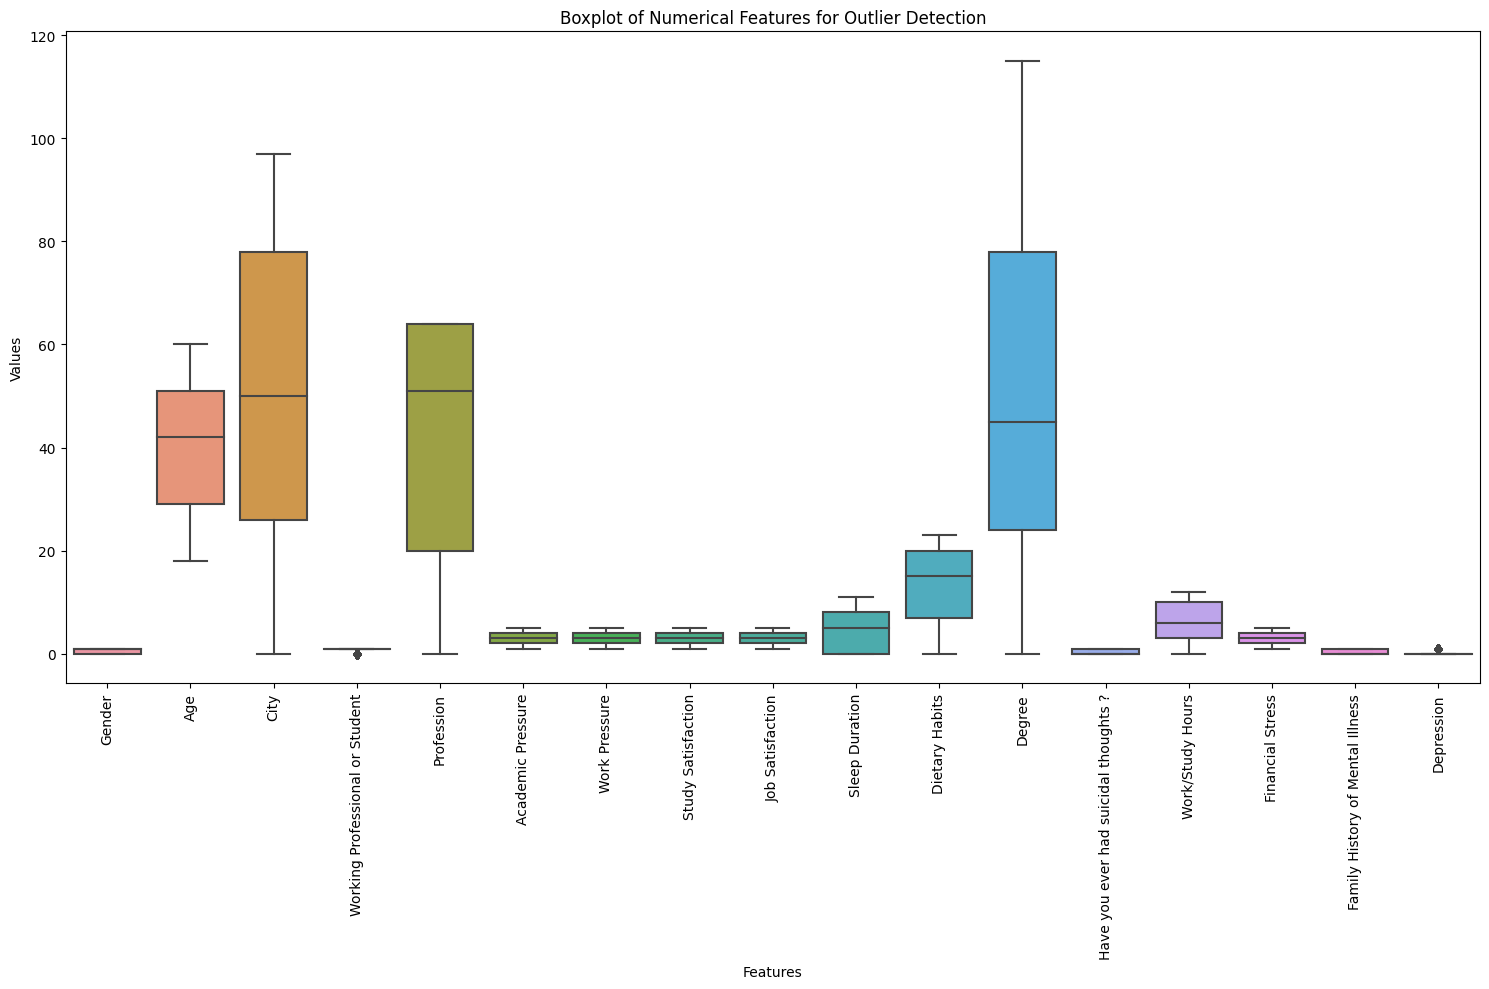

In [19]:
numerical_columns = train_encoded.select_dtypes(include=['int64', 'float64']).columns

# Set up the plot
plt.figure(figsize=(15, 10))  # Adjust the size as needed for readability
sns.boxplot(data=train_encoded[numerical_columns])
plt.xticks(rotation=90)  # Rotate feature names for better readability
plt.title("Boxplot of Numerical Features for Outlier Detection")
plt.xlabel("Features")
plt.ylabel("Values")
plt.tight_layout()  # Ensure labels are not cut off
plt.show()

## Checking the skewness of the datas and MinMax scaling: 
## Understanding the Importance of Skewness in Data
<h3 style="font-size: 18px; color: #c92966;">Why Analyze Skewness in Datasets?</h3>
<p style="font-size: 16px; color: #22b2a3;">
    Skewness provides valuable insights into the distribution of data. In many cases, features in real-world datasets exhibit skewness, where data points are not symmetrically distributed around the mean. Understanding the skewness helps us determine if specific transformations, such as <span style="color: #3498db;">log transformation</span> or other scaling methods, are needed to make the data more symmetric. Symmetric distributions tend to perform better with machine learning algorithms, particularly those that assume normality.
</p>

<p style="font-size: 16px; color: #22b2a3;">
    By evaluating the skewness of each feature, we can decide whether any adjustments are necessary to reduce the impact of outliers or make the data more suitable for certain algorithms. For instance, highly skewed data might require transformation to avoid biased predictions or to improve the model's ability to generalize.
</p>

<h3 style="font-size: 18px; color: #c92966;">Skewness in This Project</h3>
<p style="font-size: 16px; color: #22b2a3;">
    In this project, the <span style="color: #3498db;">skewness coefficients</span> for each feature were calculated, as shown below:
    <pre style="background-color: #f5f5f5; padding: 10px; color: #333333;">
    Gender                                  -0.203290
    Age                                     -0.217977
    City                                    -0.081894
    Working Professional or Student         -1.513351
    Profession                              -0.362146
    Academic Pressure                       -0.133977
    Work Pressure                            0.018515
    Study Satisfaction                       0.011764
    Job Satisfaction                         0.054361
    Sleep Duration                          -0.555179
    Dietary Habits                          -0.314442
    Degree                                   0.225651
    Have you ever had suicidal thoughts ?    0.022404
    Work/Study Hours                        -0.128169
    Financial Stress                         0.035603
    Family History of Mental Illness         0.011599
    Depression                               1.650852
    </pre>
</p>

<p style="font-size: 16px; color: #22b2a3;">
    From these coefficients, it is evident that most features are not significantly skewed, meaning the data is relatively symmetric. As a result, there is no need for special transformations, such as log transformations, to address skewness. Instead, I applied <span style="color: #3498db;">Min-Max Scaling</span> to ensure that all features are on a similar scale, which is sufficient for this dataset.
</p>


In [21]:
skewness_coefficients = train_encoded.skew(numeric_only=True)

# Display skewness coefficients
print("Skewness Coefficients for Each Column:")
print(skewness_coefficients)

Skewness Coefficients for Each Column:
Gender                                  -0.203290
Age                                     -0.217977
City                                    -0.081894
Working Professional or Student         -1.513351
Profession                              -0.362146
Academic Pressure                       -0.133977
Work Pressure                            0.018515
Study Satisfaction                       0.011764
Job Satisfaction                         0.054361
Sleep Duration                          -0.555179
Dietary Habits                          -0.314442
Degree                                   0.225651
Have you ever had suicidal thoughts ?    0.022404
Work/Study Hours                        -0.128169
Financial Stress                         0.035603
Family History of Mental Illness         0.011599
Depression                               1.650852
dtype: float64


In [22]:
X = train_encoded.drop(columns=['Depression'])
y = train_encoded['Depression']

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [24]:
# Step 1: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Initialize the MinMaxScaler
scaler = MinMaxScaler()
# Step 3: Scale the features 
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Optuna and Hyperparameter Tuning with CatBoost
<h3 style="font-size: 18px; color: #c92966;">What is Optuna?</h3>
<p style="font-size: 16px; color: #22b2a3;">
    <span style="color: #3498db;">Optuna</span> is an open-source hyperparameter optimization framework that automates the process of finding the best set of hyperparameters for machine learning models. It uses a technique called <span style="color: #3498db;">"sequential optimization"</span>, where it suggests hyperparameter values based on previous trials, leveraging various optimization algorithms like <span style="color: #3498db;">Tree-structured Parzen Estimator (TPE)</span> to make intelligent choices. Optuna simplifies hyperparameter tuning, reducing the time and effort required to achieve optimal model performance.
</p>

<h3 style="font-size: 18px; color: #c92966;">Code Explanation: Hyperparameter Tuning with Optuna and CatBoost</h3>
<p style="font-size: 16px; color: #22b2a3;">
    In this code, Optuna is used to find the optimal hyperparameters for a <span style="color: #3498db;">CatBoostClassifier</span> model. Here’s a step-by-step breakdown of what each part of the code does:
</p>

<p style="font-size: 16px; color: #22b2a3;">
    1. <strong>Define the Objective Function:</strong> The function <code>objective(trial)</code> defines the hyperparameters that Optuna will tune. Each trial represents a set of hyperparameters to be tested by Optuna.
</p>

<p style="font-size: 16px; color: #22b2a3;">
    2. <strong>Suggest Hyperparameters:</strong> Inside the function, various hyperparameters are defined using <code>trial.suggest_</code> methods:
    <ul style="font-size: 16px; color: #22b2a3;">
        <li><code>iterations</code>: Specifies the number of boosting rounds, with values between 100 and 1000.</li>
        <li><code>depth</code>: Controls the depth of the trees, which affects model complexity. Suggested values are between 4 and 10.</li>
        <li><code>learning_rate</code>: Controls the step size in each iteration, with values from 0.01 to 0.3. A lower learning rate usually improves accuracy but requires more iterations.</li>
        <li><code>l2_leaf_reg</code>: A regularization parameter to prevent overfitting, with values in a logarithmic scale from 1e-3 to 10.</li>
        <li><code>border_count</code>: Sets the number of bin borders for feature discretization, with values between 32 and 255.</li>
        <li><code>random_strength</code>: Adds randomness to trees to reduce overfitting, with values from 0.001 to 10.</li>
        <li><code>bagging_temperature</code>: Controls the intensity of bagging to stabilize training, with values between 0.0 and 1.0.</li>
    </ul>
</p>

<p style="font-size: 16px; color: #22b2a3;">
    3. <strong>Initialize CatBoost with Parameters:</strong> A <span style="color: #3498db;">CatBoostClassifier</span> is created with the parameters generated by the trial, including a fixed <code>random_state</code> for reproducibility and <code>verbose=0</code> to suppress training output.
</p>

<p style="font-size: 16px; color: #22b2a3;">
    4. <strong>Evaluate with Cross-Validation:</strong> The model's performance is evaluated using <code>cross_val_score</code> with 3-fold cross-validation on the training data (<code>X_train_scaled</code>, <code>y_train</code>). The <code>scoring='accuracy'</code> metric is used to assess the model’s accuracy across different folds.
</p>

<p style="font-size: 16px; color: #22b2a3;">
    5. <strong>Return the Mean Accuracy:</strong> The function returns the mean accuracy across the folds, which serves as the optimization objective for Optuna. Optuna aims to maximize this metric by testing different hyperparameter combinations across multiple trials.
</p>

<h3 style="font-size: 18px; color: #c92966;">Summary</h3>
<p style="font-size: 16px; color: #22b2a3;">
    This code leverages <span style="color: #3498db;">Optuna</span> to automate hyperparameter tuning for the <span style="color: #3498db;">CatBoostClassifier</span>. By using cross-validation, it ensures robust evaluation of each trial’s hyperparameters, helping to find the combination that yields the highest accuracy on the training data.
</p>


In [39]:
import optuna
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score


def objective(trial):
    # Define the hyperparameters to tune
    params = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'depth': trial.suggest_int('depth', 4, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-3, 10.0, log=True),
        'border_count': trial.suggest_int('border_count', 32, 255),
        'random_strength': trial.suggest_float('random_strength', 1e-3, 10.0),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0.0, 1.0),
        'verbose': 0  # Suppress training output
    }
    # Initialize the CatBoostClassifier
    model = CatBoostClassifier(**params, random_state=42)

    # Use cross-validation to evaluate the model
    scores = cross_val_score(model, X_train_scaled, y_train, cv=3, scoring='accuracy', n_jobs=-1)
    return scores.mean()  # Return mean accuracy as the metric to optimize

# Model training

In [41]:
# Run the Optuna study
study = optuna.create_study(direction='maximize')  # Maximize accuracy
study.optimize(objective, n_trials=15) 

# Print the best hyperparameters and score
print("Best Hyperparameters:", study.best_params)
print("Best Accuracy:", study.best_value)

# Train the final model using the best hyperparameters
best_params = study.best_params
final_model = CatBoostClassifier(**best_params, random_state=42, verbose=0)
final_model.fit(X_train_scaled, y_train)

[I 2024-11-15 08:59:13,546] A new study created in memory with name: no-name-72b803a9-4a41-452a-be35-8bbc7c02de19
[I 2024-11-15 08:59:35,549] Trial 0 finished with value: 0.9395167022032694 and parameters: {'iterations': 380, 'depth': 7, 'learning_rate': 0.045711394401285695, 'l2_leaf_reg': 2.509281676724791, 'border_count': 53, 'random_strength': 1.6441646920281512, 'bagging_temperature': 0.3306762906790661}. Best is trial 0 with value: 0.9395167022032694.
[I 2024-11-15 09:00:06,164] Trial 1 finished with value: 0.9395255863539446 and parameters: {'iterations': 650, 'depth': 6, 'learning_rate': 0.060046883456222985, 'l2_leaf_reg': 1.0260760636112893, 'border_count': 73, 'random_strength': 6.419265761163696, 'bagging_temperature': 0.3519827990318132}. Best is trial 1 with value: 0.9395255863539446.
[I 2024-11-15 09:00:09,412] Trial 2 finished with value: 0.9380241648898365 and parameters: {'iterations': 102, 'depth': 4, 'learning_rate': 0.11448642182784337, 'l2_leaf_reg': 0.00417716001

Best Hyperparameters: {'iterations': 650, 'depth': 6, 'learning_rate': 0.060046883456222985, 'l2_leaf_reg': 1.0260760636112893, 'border_count': 73, 'random_strength': 6.419265761163696, 'bagging_temperature': 0.3519827990318132}
Best Accuracy: 0.9395255863539446


# Evaluation:

In [42]:
# Evaluate on the test set
y_pred = final_model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.9396943852167733


# Summary of Test Set Preparation and Prediction
<h3 style="font-size: 18px; color: #c92966;">Test Set Preparation</h3>
<p style="font-size: 16px; color: #22b2a3;">
    For the test set, several preprocessing steps were applied to ensure consistency with the training data:
    <ul style="font-size: 16px; color: #22b2a3;">
        <li><strong>ID Column Separation:</strong> The <span style="color: #3498db;">ID column</span> was separated to avoid including it in model training and prediction. This column is typically a unique identifier and does not provide meaningful information for the model.</li>
        <li><strong>Consistent Preprocessing:</strong> The same preprocessing steps applied to the training set were also applied to the test set. This includes transformations such as encoding categorical features, handling missing values, and scaling numerical features where necessary, ensuring the model receives data in the same format for accurate predictions.</li>
    </ul>
</p>

<h3 style="font-size: 18px; color: #c92966;">Prediction with CatBoost Model</h3>
<p style="font-size: 16px; color: #22b2a3;">
    Once the test data was preprocessed, the trained <span style="color: #3498db;">CatBoostClassifier</span> model was used to generate predictions. CatBoost, optimized through hyperparameter tuning, provided predictions based on the refined test data, aiming to achieve high accuracy and generalizability on unseen data.
</p>

<p style="font-size: 16px; color: #22b2a3;">
    The predictions can then be combined with the <span style="color: #3498db;">ID column</span> to create a final output, suitable for submission or further analysis, depending on the project requirements.
</p>


In [43]:
test_ids = test['id']

In [44]:
test['Sleep Duration'] = test['Sleep Duration'].apply(
    lambda x: sleep_duration_mapping.get(str(x).replace(" ", ""), np.nan)
)

In [48]:
for col, le in encoders.items():
    if col == 'Sleep Duration':
        continue
    if col in test.columns:
        test[col] = test[col].astype(str)  # Ensure column is string before transforming
        
        # Add '-1' to the LabelEncoder classes to handle unseen categories
        le.classes_ = np.append(le.classes_, 'NaN')
        
        # Replace unseen categories with '-1' and transform
        test[col] = test[col].apply(lambda x: x if x in le.classes_ else 'NaN')
        test[col] = le.transform(test[col])


In [49]:
test = test.apply(pd.to_numeric, errors='coerce')

test_preprocessed = test.drop(['Name', 'id', 'CGPA'], axis=1, errors='ignore')

test_preprocessed_scaled = scaler.transform(test_preprocessed)

In [51]:
test_preprocessed_scaled = pd.DataFrame(test_preprocessed_scaled, columns=test_preprocessed.columns)
test_preprocessed_scaled.head()

,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,2.0,0.833333,1.000000,1.0,0.484375,NaN,0.25,NaN,1.00,NaN,0.652174,0.547826,0.0,0.750000,0.50,1.0
1,2.0,0.952381,0.453608,1.0,0.328125,NaN,0.25,NaN,0.75,NaN,0.652174,0.173913,0.0,0.500000,0.75,0.0
2,2.0,0.833333,0.340206,1.0,0.859375,NaN,0.75,NaN,0.00,0.727273,0.652174,0.147826,1.0,1.000000,0.75,0.0
3,2.0,0.119048,0.804124,0.0,1.000000,1.0,NaN,0.0,NaN,0.818182,0.652174,0.313043,1.0,0.833333,0.75,0.0
4,2.0,0.690476,0.371134,1.0,0.859375,NaN,1.00,NaN,1.00,0.727273,0.652174,0.252174,1.0,0.250000,0.75,0.0


In [52]:
# Make predictions using the trained CatBoost model
predictions = final_model.predict(test_preprocessed_scaled)

# Create a DataFrame for submission
submission = pd.DataFrame({
    'id': test_ids,
    'Depression': predictions.astype(int)  # Ensure predictions are integers
})
# Sort by id if required (optional, depending on the submission format)
submission.sort_values(by='id', inplace=True)

# Save to a CSV file in the desired format
submission.to_csv('submission.csv', index=False)

# Display the submission file
submission.head()

,id,Depression
0,140700,0
1,140701,0
2,140702,0
3,140703,1
4,140704,0


# Acknowledgments and Appreciation
<h3 style="font-size: 18px; color: #c92966;">Thank You!</h3>
<p style="font-size: 16px; color: #22b2a3;">
    Thank you to everyone who visited and explored my code. Your support and feedback are invaluable! If you found this notebook helpful, please consider leaving an <span style="color: #3498db;">upvote</span> as it helps others discover this work.
</p>

<p style="font-size: 16px; color: #22b2a3;">
    If you have any questions, feel free to comment below or reach out to me via email at <a href="mailto:Shahbods26@gmail.com" style="color: #3498db;">Shahbods26@gmail.com</a>. I’d be happy to help!
</p>
